<a href="https://colab.research.google.com/github/UW-CTRL/AA548-spr2024/blob/main/homework/hw3_problem2_helper_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [46]:

def plot_95_ellipse(mean, covariance, color="black"):
    chi_95 = 5.991
    #chi_95 = 0.1
    mean = np.array([[mean[0]],[mean[1]]])
    val, rot = np.linalg.eig(covariance)
    val = np.sqrt(val * chi_95)
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    
    plt.plot(*(rot @ (val * xy).T + mean), c=color)
    plt.fill(*(rot @ (val * xy).T + mean), alpha=0.3, c=color)

Below, is an example of how to plot ellipses, and also how to plot ellipses emanating from a (velocity) vector starting from points along a trajectory.

In [47]:
N = 20
x = np.arange(20) * 3
# generate mean velocities and covariances
mean_velocity = np.stack([5*np.cos(0.2 * x), 5*np.sin(0.2 * x)], 1)
covariance_velocity = []
for i in range(N):
    p = np.random.rand(2,2) * 0.5
    covariance_velocity += [p + p.T + np.diag([.5, .5])]

# generate position trajectory
positions = np.stack([x,  x**1.2], 1)

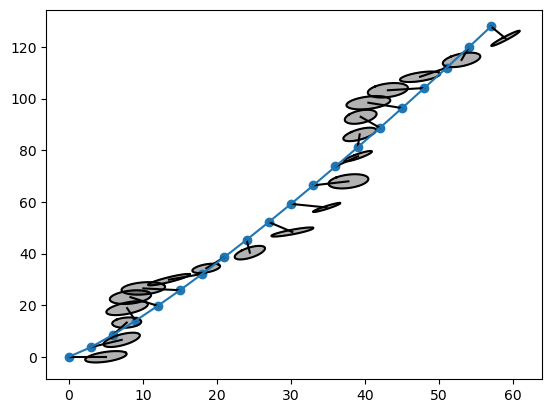

In [48]:

for (i,(u,v,p)) in enumerate(zip(mean_velocity, covariance_velocity, positions)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p+u, v)
    plt.plot([p[0],p[0]+u[0]], [p[1],p[1]+u[1]], c="black")

plt.plot(positions[:,0], positions[:,1])
plt.scatter(positions[:,0], positions[:,1])


In [65]:
# dynamics without disturbance 
dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0, 0], [0, 0], [dt, 0], [0, dt]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])

initial_state = np.array([1000, 0, 0, 50])

states = [initial_state]
controls = []
output = []
t = 0
t0 = t 

for i in range(60): 
    controls.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states.append(A @ states[i] + B @ controls[i] )
    output.append(C @ states[i])
    t += dt

controls = np.stack(controls)
states = np.stack(states)
output = np.stack(output)



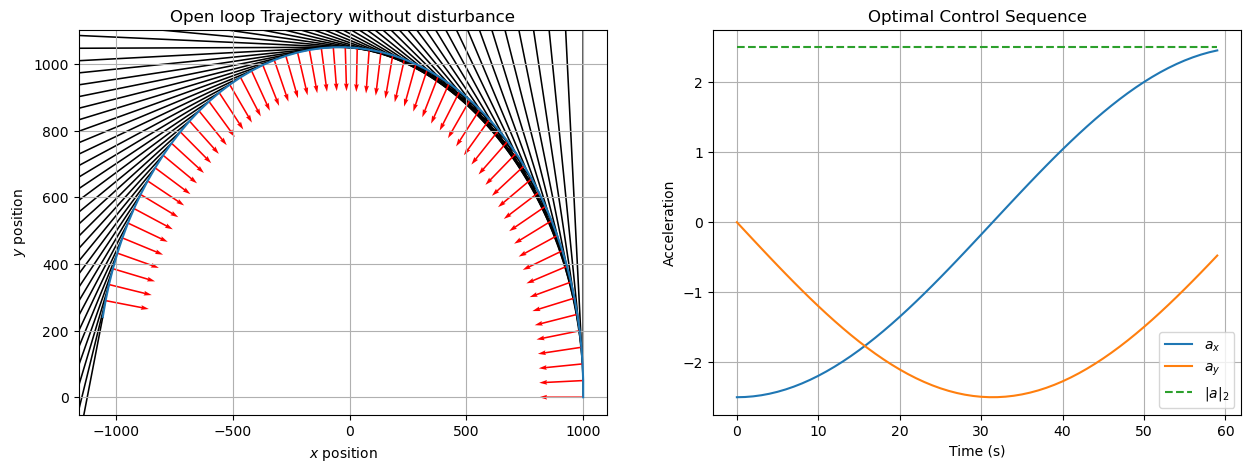

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Open loop Trajectory without disturbance")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

In [74]:
# Open loop Trajectory with disturbance

dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0.5*dt**2, 0], [0, 0.5*dt**2], [dt, 0], [0, dt]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])

Q = np.diag([0,0,1,1])
R = 9*np.diag([1,1])
mean = np.array([0,0,0,0])
meany = np.array([0,0])


initial_state = np.array([1000, 0, 0, 50])

states = [initial_state]
controls = []
output = []
t = 0
t0 = t 

for i in range(60):
    W = np.random.multivariate_normal(mean, Q,)
    V = np.random.multivariate_normal(meany, R,) 
    controls.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states.append(A @ states[i] + B @ controls[i] + W )
    output.append(C @ states[i] + V  )
    t += dt

controls = np.stack(controls)
states = np.stack(states)
output = np.stack(output)



In [75]:
# Open loop Trajectory with disturbance

dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0.5*dt**2, 0], [0, 0.5*dt**2], [dt, 0], [0, dt]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])

Q = np.diag([0,0,1,1])
R = 9*np.diag([1,1])
mean = np.array([0,0,0,0])
meany = np.array([0,0])


initial_state = np.array([1000, 0, 0, 50])

states2 = [initial_state]
controls2 = []
output2 = []
t = 0
t0 = t 

for i in range(60):
    W = np.random.multivariate_normal(mean, Q,)
    V = np.random.multivariate_normal(meany, R,) 
    controls2.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states2.append(A @ states2[i] + B @ controls2[i] + W )
    output2.append(C @ states2[i] + V  )
    t += dt

controls2 = np.stack(controls2)
states2 = np.stack(states2)
output2 = np.stack(output2)

In [88]:
# Open loop Trajectory with disturbance

dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0.5*dt**2, 0], [0, 0.5*dt**2], [dt, 0], [0, dt]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])

Q = np.diag([0,0,1,1])
R = 9*np.diag([1,1])
mean = np.array([0,0,0,0])
meany = np.array([0,0])


initial_state = np.array([1000, 0, 0, 50])

states3 = [initial_state]
controls3 = []
output3 = []
t = 0
t0 = t 

for i in range(60):
    W = np.random.multivariate_normal(mean, Q,)
    V = np.random.multivariate_normal(meany, R,) 
    controls3.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states3.append(A @ states3[i] + B @ controls3[i] + W )
    output3.append(C @ states3[i] + V  )
    t += dt

controls3 = np.stack(controls3)
states3 = np.stack(states3)
output3 = np.stack(output3)

' plt.subplot(1,2,2)\nplt.plot(controls)\nplt.plot(np.linalg.norm(controls, 2, axis=1), \'--\')\nplt.title("Optimal Control Sequence")\nplt.xlabel("Time (s)")\nplt.ylabel("Acceleration")\nplt.legend(["$a_x$", "$a_y$", "$\\|a\\|_2$"])\nplt.grid() '

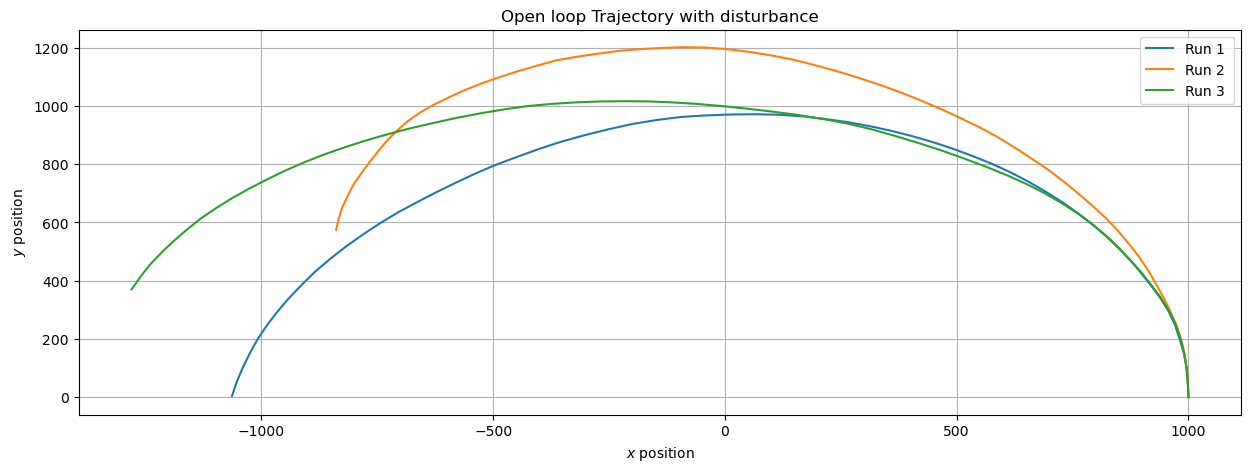

In [89]:
plt.figure(figsize=(15,5))
#plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.plot(states2[:,0], states2[:,1])
plt.plot(states3[:,0], states3[:,1])
#plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
#plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Open loop Trajectory with disturbance")
plt.legend(["Run 1 ", "Run 2", "Run 3"])
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()


""" plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid() """

In [90]:
# Design KF 
def KF(AA, BB, CC, UU, YY, QIN, RIN, mu0, sigma0):
        
        I = np.diag([1,1,1,1])
        
        mup = AA @ mu0 + BB @ UU
        sigmap = AA @ sigma0 @ AA.T + QIN

        k = sigmap @ CC.T @ inv((CC @ sigmap @ CC.T + RIN))
        munext = mup + k @ ( YY - CC @ mup)
        sigmanext = (I - k @ CC ) @ sigmap
        return k, munext, sigmanext 

In [246]:
QK = np.diag([0, 0, 1, 1])
RK = 9000*np.diag([1, 1])

In [247]:
dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0.5*dt**2, 0], [0, 0.5*dt**2], [dt, 0], [0, dt]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])

Q = np.diag([0,0,1,1])
R = 9000*np.diag([1,1])
mean = np.array([0,0,0,0])
meany = np.array([0,0])


initial_state = np.array([1500, 100, 0, 55])

states = [initial_state]
controls = []
output = []
t = 0
t0 = t 

for i in range(60):
    W = np.random.multivariate_normal(mean, Q)
    V = np.random.multivariate_normal(meany, R) 
    controls.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states.append(A @ states[i] + B @ controls[i] + W )
    output.append(C @ states[i] + V  )
    t += dt

controls = np.stack(controls)
states = np.stack(states)
output = np.stack(output)



In [253]:
muini = np.array([1500, 100, 0, 55])
sigmini = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 9000, 0], [0, 0, 0, 9000]])
muin = [muini]
sigmin = [sigmini]
kk = []
for i in range(60):
    u = controls[i]
    y = output[i]
    kknx, munx, sigmnx = KF(A, B, C, u, y, QK, sigmin[i][0:2,0:2], muin[i], sigmin[i])
    #kknx, munx, sigmnx = KF(A, B, C, u, y, QK, RK, muin[i], sigmin[i])
    kk.append(kknx)
    muin.append(munx)
    sigmin.append(sigmnx)

muin  = np.stack(muin)
kk  = np.stack(kk)
sigmin  = np.stack(sigmin)

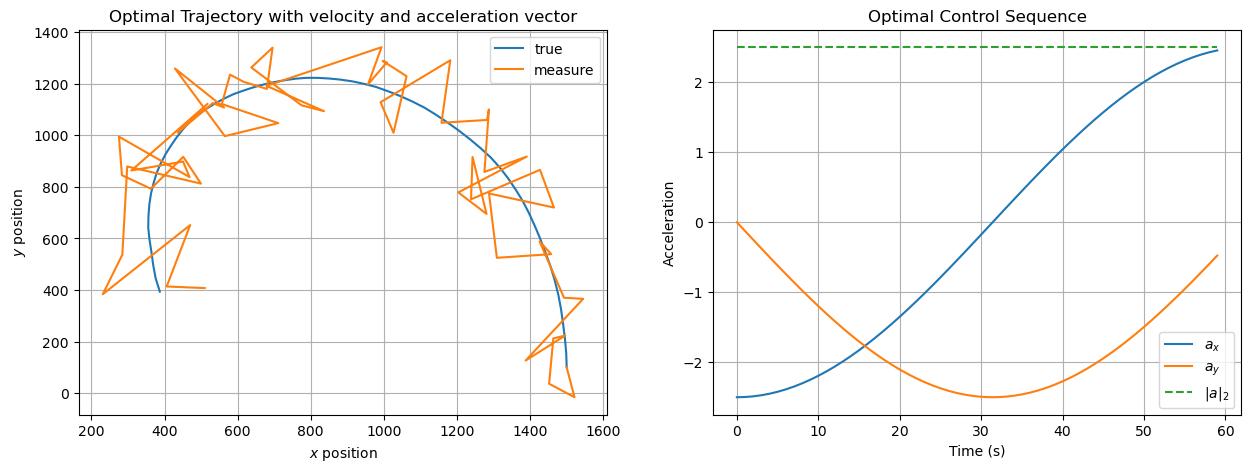

In [254]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.plot(muin[:,0], muin[:,1])
""" plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector """
plt.title("Optimal Trajectory with velocity and acceleration vector")
plt.legend(["true", "measure"])
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

In [255]:
position = states[:,0:2]
vel = states[:,2:4]
mean_p = muin[:,0:2]
mean_Vel = muin[:,2:4]
covarianceP=[]
covarianceVel=[]
for i in range(60):
    covarianceP.append(sigmin[i][0:2,0:2])
    covarianceVel.append(sigmin[i][2:4,2:4])


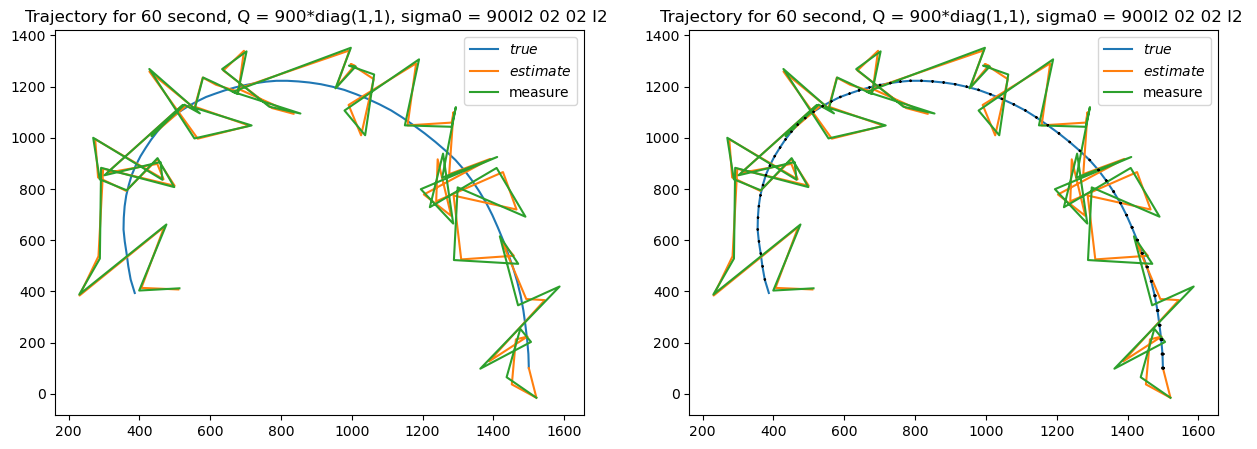

In [256]:
""" for (i,(u,v,p)) in enumerate(zip(mean_p, covarianceP, position)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p+u, v)
    plt.plot([p[0],p[0]+u[0]], [p[1],p[1]+u[1]], c="black") """
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(position[:,0], position[:,1])
plt.plot(mean_p[:,0], mean_p[:,1])
plt.plot(output[:,0], output[:,1])
plt.legend(["$true$", "$estimate$", "measure"])
plt.title("Trajectory for 60 second, Q = 900*diag(1,1), sigma0 = 900I2 02 02 I2 ")


plt.subplot(1,2,2)
plt.plot(position[:,0], position[:,1])
plt.plot(mean_p[:,0], mean_p[:,1])
plt.plot(output[:,0], output[:,1])
plt.legend(["$true$", "$estimate$", "measure"])
plt.title("Trajectory for 60 second, Q = 900*diag(1,1), sigma0 = 900I2 02 02 I2 ")
for (i,(u,v,p)) in enumerate(zip(mean_p, covarianceP,position)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p, v)
    

#plt.scatter(position[:,0], position[:,1])

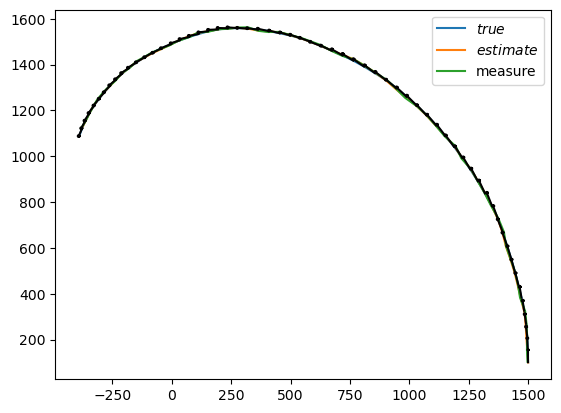

In [60]:
plt.plot(position[:,0], position[:,1])
plt.plot(mean_p[:,0], mean_p[:,1])
plt.plot(output[:,0], output[:,1])
plt.legend(["$true$", "$estimate$", "measure"])
for (i,(u,v,p)) in enumerate(zip(mean_Vel, covarianceVel, position)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p+u, v)
    plt.plot([p[0],p[0]+u[0]], [p[1],p[1]+u[1]], c="black")
    

In [61]:
dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0.5*dt**2, 0], [0, 0.5*dt**2], [dt, 0], [0, dt]])
C = np.array([[0, 0, 1, 0], [0, 0, 0, 1]])

Q = np.diag([0,0,1,1])
R = 9*np.diag([1,1])
mean = np.array([0,0,0,0])
meany = np.array([0,0])


initial_state = np.array([1500, 100, 0, 55])

states = [initial_state]
controls = []
output = []
t = 0
t0 = t 

for i in range(60):
    W = np.random.multivariate_normal(mean, Q)
    V = np.random.multivariate_normal(meany, R) 
    controls.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states.append(A @ states[i] + B @ controls[i] + W )
    output.append(C @ states[i] + V  )
    t += dt

controls = np.stack(controls)
states = np.stack(states)
output = np.stack(output)



In [62]:
muini = np.array([1500, 0, 0, 50])
sigmini = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
muin = [muini]
sigmin = [sigmini]
kk = []
for i in range(60):
    u = controls[i]
    y = output[i]
    kknx, munx, sigmnx = KF(A, B, C, u, y, QK, RK, muin[i], sigmin[i])
    kk.append(kknx)
    muin.append(munx)
    sigmin.append(sigmnx)



muin  = np.stack(muin)
kk  = np.stack(kk)
sigmin  = np.stack(sigmin)

In [63]:
position = states[:,0:2]
vel = states[:,2:4]
mean_p = muin[:,0:2]
mean_Vel = muin[:,2:4]
covarianceP=[]
covarianceVel=[]
for i in range(60):
    covarianceP.append(sigmin[i][0:2,0:2])
    covarianceVel.append(sigmin[i][2:4,2:4])

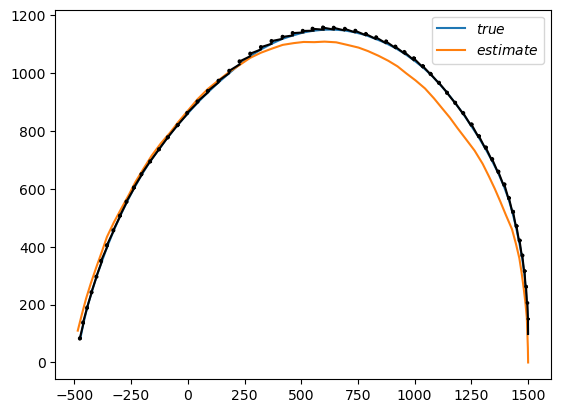

In [64]:
plt.plot(position[:,0], position[:,1])
plt.plot(mean_p[:,0], mean_p[:,1])
#plt.plot(output[:,0], output[:,1])
plt.legend(["$true$", "$estimate$", "measure"])
for (i,(u,v,p)) in enumerate(zip(mean_Vel, covarianceVel, position)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p+u, v)
    plt.plot([p[0],p[0]+u[0]], [p[1],p[1]+u[1]], c="black")